# Proof

Compared to $(1.1)$, the only difference is that instead of $E(w)$, we have $\displaystyle\tilde E(w)=\dfrac{1}{2}\sum_{n=1}^N{[y(x_n,w)-t_n]^2}+\dfrac{\lambda}{2}\lVert w\rVert^2$.

Hence, $\displaystyle\dfrac{\partial\tilde E}{\partial w_i}=\sum_{n=1}^N{[y(x_n,w)-t_n]x_n^i}+\lambda w_i=0$

$\displaystyle\Rightarrow\sum_{j=0}^M{\sum_{n=1}^N{x_n^{i+j}w_j}}+\lambda w_i=\sum_{n=1}^N{x_n^i t_n}$

$\displaystyle\Rightarrow\sum_{j=0}^M{\left[\sum_{n=1}^N{x_n^{i+j}}+\delta_{ij}\lambda\right]w_j}=\sum_{n=1}^N{x_n^i t_n}$,
where $\delta_{ij}=
\begin{cases}
0, &j\neq i\\
1, &j=i
\end{cases}$.

(See wikipedia [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta))

Let $\displaystyle\tilde A_{i_j}=\sum_{n=1}^N{x_n^{i+j}}+\delta_{ij}\lambda$, and we have $\displaystyle\sum_{j=0}^M{\tilde A_{ij}w_i}=T_i$.

# Experimentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Generate $x$ and $t$ with $N=10$.

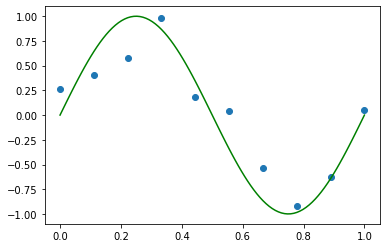

In [2]:
N, lambd = 10, np.e ** -18
x = np.linspace(0, 1, N)
t = np.sin(2 * np.pi * x) + np.random.normal(0, .2, N)  # sin(2𝛑x) + noise

plt.scatter(x, t)
test = np.linspace(0, 1, 100)
plt.plot(test, np.sin(2 * np.pi * test), 'g')

Solve $\tilde Aw=T$ and see how well $y(x,w)$ is fitting the curve with the *regularization* term.

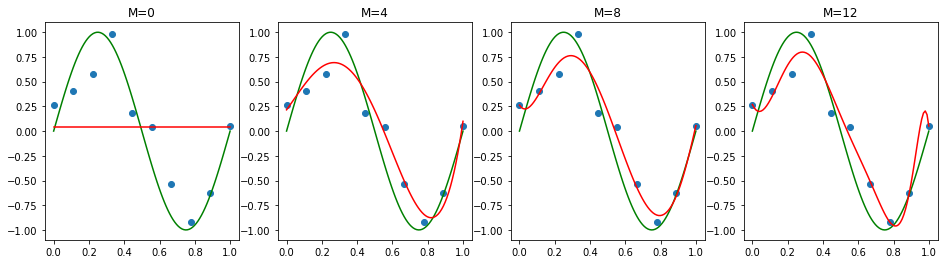

In [3]:
def display(M, plt):
    M += 1
    
    f = lambda i, j: np.sum(x ** (i + j))
    A = np.fromfunction(np.vectorize(f), (M, M))
    A += np.eye(M) * lambd  # note how the regularizer \lambda is added

    g = lambda i: np.sum((x ** i) * t)
    T = np.fromfunction(np.vectorize(g), (M,))

    w = np.linalg.solve(A, T)

    plt.scatter(x, t)
    plt.plot(test, np.sin(2 * np.pi * test), 'g')
    plt.plot(test, np.array([test ** j for j in range(0, M)]).T @ w, 'r')
    plt.set_title(f"M={M-1}")


_, plots = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for i, plot in enumerate(plots):
    display(i * 4, plot)

Set $\lambda=0.5$ and see how larger $\lambda$ leads to underfitting.

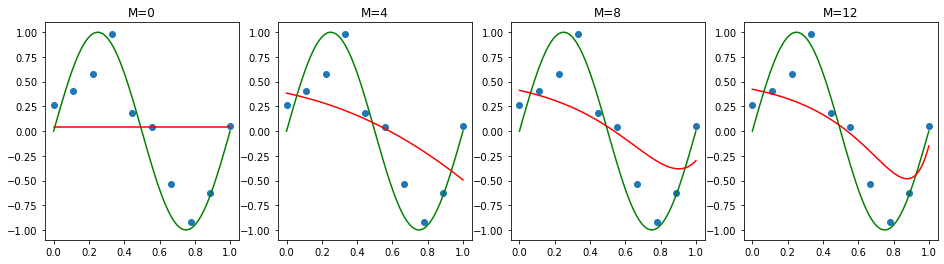

In [4]:
lambd = .5
_, plots = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for i, plot in enumerate(plots):
    display(i * 4, plot)